In [2]:
# veri analzizi için gerekli kütüphaneleri ekledim 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [10]:
dataFrame= pd.read_csv("Student_Performance.csv")
dataFrame.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
dataFrame.describe()
##Veri setinizin hızlı bir istatistiksel özetini almak için kullanılır. "Verilerim hakkında bana kısa ve öz bilgi ver" komutudur.
 # Kaç veri var?
# Ortalama
# Standart sapma
# Minimum değer
# 1. çeyrek
# Medyan (2. çeyrek)
# 3. çeyrek
# Maximum değer
# 1. Temel Bilgiler: Kaç veri var? Eksik veri var mı? (count sayısına bak) Ortalama değerler nedir?
# 2. Dağılım Analizi: Veriler nasıl yayılmış? Aykırı değer (outlier) var mı? min, max, çeyrekliklere bak

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [14]:
#dataFrame.isnull()  burada tabloda null var mı yok mu diye bakılıyor veri null ise true -değilse false
dataFrame.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Using matplotlib backend: module://matplotlib_inline.backend_inline


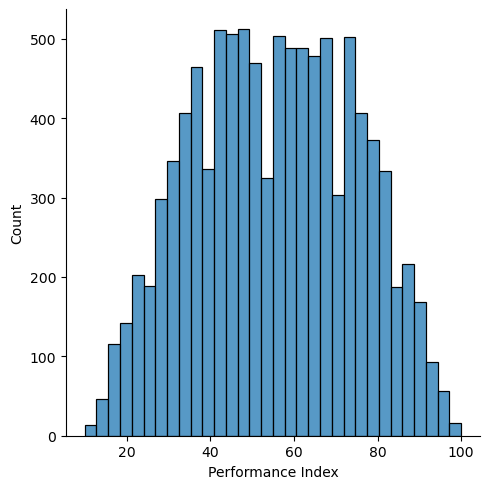

In [15]:
# hangi özellik daha ağir diye bakmak için dataset veya hangisi daha çok etkiliyor analiz yapmak için grafiğe bakiyoruz
%matplotlib
sbn.displot(dataFrame["Performance Index"])

<Axes: ylabel='count'>

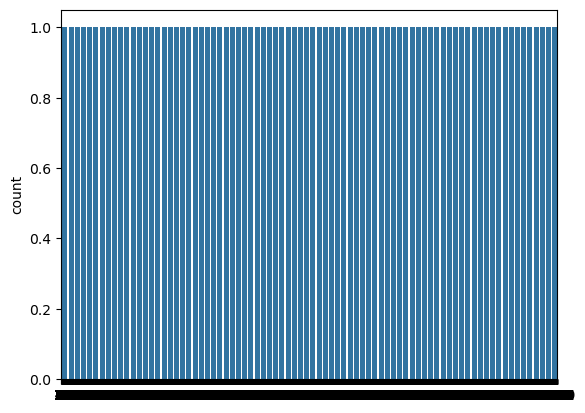

In [17]:
#sbn.countplot(dataFrame["Sleep Hours"])

In [20]:
dataFrame["Extracurricular Activities"]=dataFrame["Extracurricular Activities"].map({'Yes':1,'No':0})

In [21]:
# Sadece sayısal sütunların korelasyonunu al
#thoughtfulness Kısaca .corr() fonksiyonunun amacı, veri setindeki sütunların birbirleriyle ne kadar güçlü bir ilişkiye sahip olduğunu matematiksel olarak ölçmektir.
dataFrame.corr(numeric_only=True)["Performance Index"].sort_values()

Extracurricular Activities          0.024525
Sample Question Papers Practiced    0.043268
Sleep Hours                         0.048106
Hours Studied                       0.373730
Previous Scores                     0.915189
Performance Index                   1.000000
Name: Performance Index, dtype: float64

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

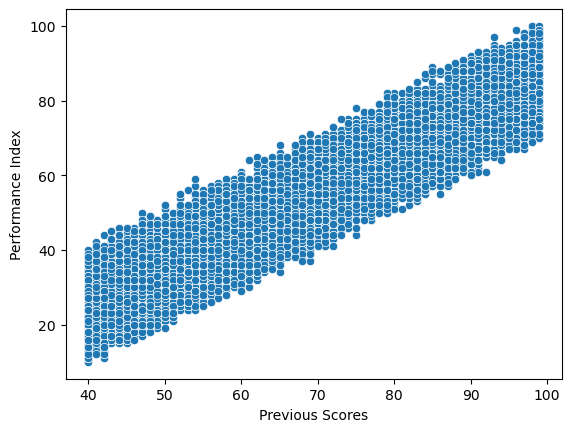

In [30]:
sbn.scatterplot(x="Previous Scores", y="Performance Index" , data=dataFrame)

In [32]:
dataFrame.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [33]:
dataFrame.sort_values("Performance Index",ascending=False).head(20)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
145,9,98,1,7,7,100.0
2725,9,99,1,8,8,100.0
2070,9,98,1,4,5,100.0
2637,9,99,0,9,4,99.0
7348,9,99,1,8,1,99.0
8478,9,96,1,8,9,99.0
1077,9,98,1,9,8,99.0
1157,8,99,1,8,9,99.0
3049,9,99,1,5,7,99.0
2296,8,99,0,9,6,98.0


In [38]:
dataFrame.groupby("Sleep Hours").mean()["Performance Index"]

Sleep Hours
4    53.794935
5    54.801370
6    54.660490
7    55.278043
8    55.932373
9    56.811344
Name: Performance Index, dtype: float64

# Datasetin verilerini split(bölme) ve scale(ölçeklendirme) yapacağız

In [39]:
# burada oğrencilerin uyuma saatlerine göre oğrencilerin performans ortalamalari alındı
# Genelikle hedef değişken (y) ölçeklendirilmez (Anlam Kayıbı: Model bize doğrudan performans indeks cinsinden cevap vermesini isteriz)
# önce veriyi  x ve y diye ayırıp daha sonra x verisini ölçeklendirceğız

In [42]:
x=dataFrame.drop("Performance Index", axis=1).values ## bir numpy dizine çevirmek için 
y=dataFrame["Performance Index"].values

In [44]:
x

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]])

In [45]:
y

array([91., 65., 45., ..., 74., 95., 64.])

In [43]:
# verileri eğtim ve test için ayrıyoyuz gerekli kütüpahneleri ekliyoruz

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=10)

In [58]:
len(x_train)

6700

In [59]:
len(x_test)

3300

In [60]:
# scale işlemi için gerekli kütüpahneler ekliyoruz

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler= MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [65]:
x_train.shape #x_train: Modelin eğitimi için ayırdığın özelliklerin (yaş, fiyat, konum vb.) bulunduğu veri kümesidir.

(6700, 5)

In [66]:
y_train.shape

(6700,)

In [67]:
# modeli oluşturmak ve ara katmanlari oluşturmak için gerekli kütüpahneler ekliyoruz

In [69]:
from tensorflow.keras.models import Sequential # model oluşturmak için kullanılır
from tensorflow.keras.layers import Dense # gizli katmanları araya koymak için kullanılır 

In [87]:
model=Sequential()

# ilk katmanda 8 nöron ile kulandım 
# ikinci katmanda 10 nörron 
# 3 katmanda da 10  ""
model.add(Dense(12, activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(12, activation="relu"))

# çikiş katmani
model.add(Dense(1))
model.compile(optimizer="adam", loss="mae")

In [88]:
# modeli eğitmek için 
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=200, epochs=300)

Epoch 1/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 55.1959 - val_loss: 54.6588
Epoch 2/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 54.5745 - val_loss: 53.5362
Epoch 3/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 52.1059 - val_loss: 48.6380
Epoch 4/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 41.5591 - val_loss: 28.6817
Epoch 5/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.7743 - val_loss: 9.5075
Epoch 6/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.3126 - val_loss: 7.8722
Epoch 7/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.0985 - val_loss: 6.5696
Epoch 8/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.8215 - val_loss: 5.2198
Epoch 9/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5021 - val_loss: 3.8811
Epoch 10/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2770 - val_loss: 2.7839
Epoch 11/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4051 - val_loss: 2.1307
Epoch 12/300
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

In [86]:
## loss 364.9038 - val_loss: 377.6251 // adam mse  8 sigmoid 10, 10 ,12
## loss 1.6567 -val_loss: 1.6329 // adam mae 12 12 12 12 relu
# loss: 4.1709 - val_loss: 4.2513 // adam mse 12 12 12 12 relu ren güzel sonuç veren bu 
# bu modelde 3 tane deneme yapıldı 

In [81]:
model.history.history # bu bize bir numpy dizisi veriri 

{'loss': [55.10129165649414,
  54.04616165161133,
  50.619468688964844,
  37.69804382324219,
  17.69688606262207,
  14.586638450622559,
  13.150102615356445,
  11.585186958312988,
  9.758772850036621,
  7.733004093170166,
  5.446804046630859,
  3.263906478881836,
  2.0830721855163574,
  1.7212737798690796,
  1.6954470872879028,
  1.6620721817016602,
  1.6661794185638428,
  1.657244086265564,
  1.6473255157470703,
  1.6509472131729126,
  1.6473418474197388,
  1.6471192836761475,
  1.6495327949523926,
  1.6399211883544922,
  1.6398166418075562,
  1.6412088871002197,
  1.6386524438858032,
  1.6393550634384155,
  1.6487230062484741,
  1.6406878232955933,
  1.636765956878662,
  1.638020396232605,
  1.6471657752990723,
  1.657287836074829,
  1.6347663402557373,
  1.6346282958984375,
  1.6347132921218872,
  1.6364275217056274,
  1.6367470026016235,
  1.647986650466919,
  1.632218837738037,
  1.6364262104034424,
  1.6440300941467285,
  1.6347893476486206,
  1.6302623748779297,
  1.627766847610

In [82]:
kayipVerisi= pd.DataFrame(model.history.history)

In [83]:
kayipVerisi.head()

,loss,val_loss
0,55.101292,54.395077
1,54.046162,52.638699
2,50.619469,46.248703
3,37.698044,24.268736
4,17.696886,15.544163


In [89]:
# kayip verisinin polt garfiğini çizdiriyoruz doğrulama ve kayip ve eğitim kayibinin doğrusal olarak 
# val_loss Neden Çok Önemli?
#Bir modelin loss değeri (çözümlü sorular) çok düşük olsa bile, eğer val_loss değeri (sınav) yüksekse; o model aslında konuyu öğrenmemiş,
#sadece soruları ve cevaplarını ezberlemiş demektir. Biz buna veri biliminde Overfitting (Aşırı Öğrenme/Ezberleme) diyoruz.
# loss azalıyor, val_loss da azalıyorsa: Harika! Model konuyu gerçekten öğreniyor.
##loss azalıyor ama val_loss artıyorsa: Dikkat! Model konuyu anlamayı bırakmış, verileri ezberlemeye başlamış demektir.

Text(0, 0.5, 'Loss')

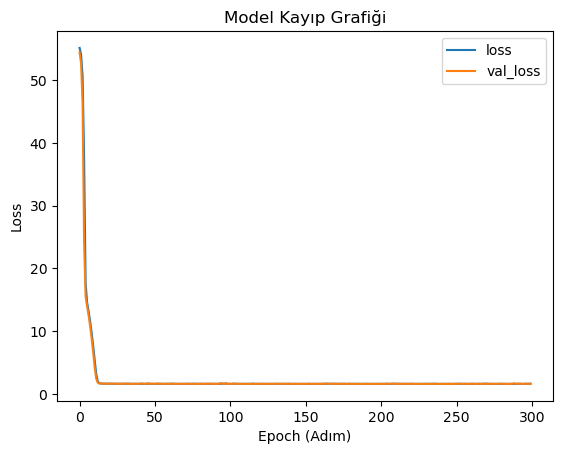

In [91]:
kayipVerisi.plot()
plt.title("Model Kayıp Grafiği")
plt.xlabel("Epoch (Adım)")
plt.ylabel("Loss")

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [93]:
tahminDizisi= model.predict(x_test)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [94]:
tahminDizisi

array([[41.03716 ],
       [26.353992],
       [33.900223],
       ...,
       [45.693233],
       [45.917103],
       [50.97495 ]], dtype=float32)

In [96]:
mean_absolute_error(y_test,tahminDizisi)

1.6751356500567811

In [97]:
dataFrame.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


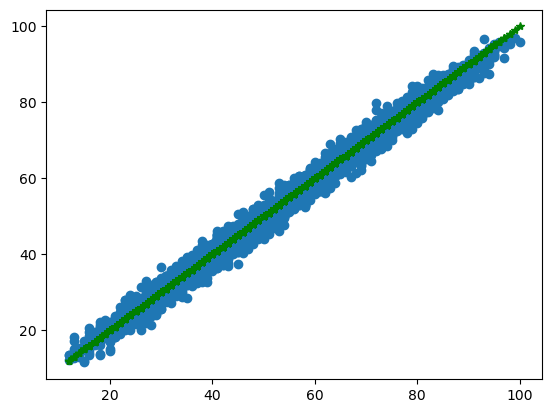

In [98]:
plt.scatter(y_test, tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [ ]:
### son olarak test için tahmin üretelim bir değer modeli test etmek için 